# **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# **Loading Data**

In [2]:
# Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words
batch_size = 512

# Load the dataset, keeping only the top 10,000 most common words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad the sequences so that each review is of the same length (500 words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Print the shape of the training and test data
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)
y_train shape: (25000,)
y_test shape: (25000,)


# **Configuration Definition**

In [3]:
# Define different configurations to experiment with
experiment_configs = [
    # 1 Hidden Layer Configurations with relu
    {'hidden_layers': 1, 'hidden_units': 32, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 64, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 128, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # 3 Hidden Layers Configurations with relu
    {'hidden_layers': 3, 'hidden_units': 32, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 64, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 128, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # Change Loss Function to MSE
    # 1 Hidden Layer Configurations with relu
    {'hidden_layers': 1, 'hidden_units': 32, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 64, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 128, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # 3 Hidden Layers Configurations with relu
    {'hidden_layers': 3, 'hidden_units': 32, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 64, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 128, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # Change Activation Function to Tanh
    # 1 Hidden Layer Configurations with tanh
    {'hidden_layers': 1, 'hidden_units': 32, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 64, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 128, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # 3 Hidden Layers Configurations with tanh
    {'hidden_layers': 3, 'hidden_units': 32, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 64, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 128, 'loss_function': 'binary_crossentropy', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # Combination: 1 & 3 Hidden Layers with Tanh Activation, MSE Loss
    # 1 Hidden Layer Configurations
    {'hidden_layers': 1, 'hidden_units': 32, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 64, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 1, 'hidden_units': 128, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},

    # 3 Hidden Layers Configurations
    {'hidden_layers': 3, 'hidden_units': 32, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 64, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},
    {'hidden_layers': 3, 'hidden_units': 128, 'loss_function': 'mean_squared_error', 'activation_function': 'tanh', 'dropout_rate': 0.5, 'l2_reg': 0.01},

]


# **Model Definition**

In [4]:

# Function to build the model based on configuration
def build_model(config):
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=(500,)))  # Input shape based on your dataset
    model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=500))
    model.add(layers.Flatten())  # Flatten to convert 2D embeddings to 1D

    # Add hidden layers based on the config
    for _ in range(config['hidden_layers']):
        model.add(layers.Dense(config['hidden_units'],
                               activation=config['activation_function'],
                               kernel_regularizer=regularizers.l2(config['l2_reg'])))
        model.add(layers.Dropout(config['dropout_rate']))

    # Output layer (binary classification)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss=config['loss_function'],
                  metrics=['accuracy'])

    return model


In [5]:

# Train and evaluate models on each configuration
results = []

for config in experiment_configs:
    print(f"Training model with config: {config}")

    # Build the model
    model = build_model(config)

    # Display the model summary
    model.summary()

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    # Save the results
    results.append({
        'config': config,
        'history': history.history,
        'test_loss': test_loss,
        'test_acc': test_acc
    })

Training model with config: {'hidden_layers': 1, 'hidden_units': 32, 'loss_function': 'binary_crossentropy', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.5097 - loss: 0.9208 - val_accuracy: 0.6620 - val_loss: 0.7011
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7127 - loss: 0.6355 - val_accuracy: 0.8597 - val_loss: 0.4512
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8673 - loss: 0.4450 - val_accuracy: 0.8611 - val_loss: 0.4259
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8992 - loss: 0.3790 - val_accuracy: 0.8791 - val_loss: 0.3988
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9160 - loss: 0.3457 - val_accuracy: 0.8806 - val_loss: 0.4074
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9303 - loss: 0.3291 - val_accuracy: 0.8792 - val_loss: 0.4174
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9435 - loss: 0.3085 - val_accuracy: 0.8722 - val_loss: 0.4313
Training model with config: {'hidden_layers': 1, 'hidden_units': 64, 'loss_function': 'binary_crossentropy', 'a

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.5594 - loss: 1.0959 - val_accuracy: 0.8300 - val_loss: 0.5429
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8506 - loss: 0.4980 - val_accuracy: 0.8593 - val_loss: 0.4556
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8963 - loss: 0.4129 - val_accuracy: 0.8597 - val_loss: 0.4606
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9161 - loss: 0.3747 - val_accuracy: 0.8714 - val_loss: 0.4523
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9245 - loss: 0.3569 - val_accuracy: 0.8709 - val_loss: 0.4532
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9462 - loss: 0.3180 - val_accuracy: 0.8606 - val_loss: 0.4739
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9581 - loss: 0.2908 - val_accuracy: 0.8774 - val_loss: 0.4513
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9688 - loss: 0.2714 - val_accuracy: 0.8798 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.5084 - loss: 1.6544 - val_accuracy: 0.5151 - val_loss: 0.7367
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5935 - loss: 0.7108 - val_accuracy: 0.8376 - val_loss: 0.5065
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8614 - loss: 0.4741 - val_accuracy: 0.8681 - val_loss: 0.4523
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8948 - loss: 0.4075 - val_accuracy: 0.7963 - val_loss: 0.5928
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8950 - loss: 0.4072 - val_accuracy: 0.8457 - val_loss: 0.4999
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9120 - loss: 0.3940 - val_accuracy: 0.8717 - val_loss: 0.4428
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9355 - loss: 0.3329 - val_accuracy: 0.8714 - val_loss: 0.4589
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9394 - loss: 0.3361 - val_accuracy: 0.8794 - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.4994 - loss: 1.4968 - val_accuracy: 0.5000 - val_loss: 1.1056
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5034 - loss: 1.0603 - val_accuracy: 0.5000 - val_loss: 0.9366
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5030 - loss: 0.9079 - val_accuracy: 0.5000 - val_loss: 0.8351
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5031 - loss: 0.8176 - val_accuracy: 0.5000 - val_loss: 0.7736
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4997 - loss: 0.7632 - val_accuracy: 0.5000 - val_loss: 0.7374
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4941 - loss: 0.7314 - val_accuracy: 0.5000 - val_loss: 0.7167
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4999 - loss: 0.7134 - val_accuracy: 0.5000 - val_loss: 0.7053
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4965 - loss: 0.7036 - val_accuracy: 0.5000 -

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.5105 - loss: 2.1573 - val_accuracy: 0.5794 - val_loss: 1.3467
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6128 - loss: 1.2383 - val_accuracy: 0.8300 - val_loss: 0.9024
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8110 - loss: 0.8842 - val_accuracy: 0.8506 - val_loss: 0.6783
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8735 - loss: 0.6332 - val_accuracy: 0.8684 - val_loss: 0.5890
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9049 - loss: 0.5351 - val_accuracy: 0.8653 - val_loss: 0.5848
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9262 - loss: 0.4709 - val_accuracy: 0.8634 - val_loss: 0.5879
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9441 - loss: 0.4281 - val_accuracy: 0.8583 - val_loss: 0.6362
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9606 - loss: 0.3922 - val_accuracy: 0.8691 - v

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5019 - loss: 3.4294 - val_accuracy: 0.5511 - val_loss: 1.6167
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5223 - loss: 1.4061 - val_accuracy: 0.5364 - val_loss: 0.9711
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5313 - loss: 0.9023 - val_accuracy: 0.5000 - val_loss: 0.7661
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5467 - loss: 0.7466 - val_accuracy: 0.5045 - val_loss: 0.7102
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6648 - loss: 0.7151 - val_accuracy: 0.5000 - val_loss: 1.4821
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5003 - loss: 1.3709 - val_accuracy: 0.5156 - val_loss: 0.7703
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5025 - loss: 0.7405 - val_accuracy: 0.5014 - val_loss: 0.7063
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5056 - loss: 0.7040 - val_accuracy: 0.5067 -

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5140 - loss: 0.4389 - val_accuracy: 0.7270 - val_loss: 0.2400
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7825 - loss: 0.2088 - val_accuracy: 0.8260 - val_loss: 0.1695
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8662 - loss: 0.1537 - val_accuracy: 0.8422 - val_loss: 0.1580
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8828 - loss: 0.1426 - val_accuracy: 0.8706 - val_loss: 0.1421
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9013 - loss: 0.1283 - val_accuracy: 0.8779 - val_loss: 0.1467
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9075 - loss: 0.1296 - val_accuracy: 0.8754 - val_loss: 0.1442
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9202 - loss: 0.1227 - val_accuracy: 0.8751 - val_loss: 0.1396
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9281 - loss: 0.1118 - val_accuracy: 0.8790 - v

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5171 - loss: 0.5879 - val_accuracy: 0.7640 - val_loss: 0.2331
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7911 - loss: 0.2138 - val_accuracy: 0.8313 - val_loss: 0.1896
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8648 - loss: 0.1620 - val_accuracy: 0.8714 - val_loss: 0.1508
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8973 - loss: 0.1398 - val_accuracy: 0.8693 - val_loss: 0.1527
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9078 - loss: 0.1306 - val_accuracy: 0.8558 - val_loss: 0.1618
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9143 - loss: 0.1304 - val_accuracy: 0.8670 - val_loss: 0.1545
Training model with config: {'hidden_layers': 1, 'hidden_units': 128, 'loss_function': 'mean_squared_error', 'activation_function': 'relu', 'dropout_rate': 0.5, 'l2_reg': 0.01}


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.5103 - loss: 0.9063 - val_accuracy: 0.7004 - val_loss: 0.2574
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7665 - loss: 0.2335 - val_accuracy: 0.8202 - val_loss: 0.1909
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8638 - loss: 0.1669 - val_accuracy: 0.8700 - val_loss: 0.1600
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8762 - loss: 0.1625 - val_accuracy: 0.8563 - val_loss: 0.1727
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8965 - loss: 0.1493 - val_accuracy: 0.8564 - val_loss: 0.1746
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9029 - loss: 0.1435 - val_accuracy: 0.8723 - val_loss: 0.1538
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9202 - loss: 0.1281 - val_accuracy: 0.8757 - val_loss: 0.1543
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9227 - loss: 0.1282 - val_accuracy: 0.8693 - v

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.5007 - loss: 0.9766 - val_accuracy: 0.5000 - val_loss: 0.6350
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5016 - loss: 0.5891 - val_accuracy: 0.5053 - val_loss: 0.4740
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5030 - loss: 0.4466 - val_accuracy: 0.5000 - val_loss: 0.3776
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5013 - loss: 0.3612 - val_accuracy: 0.5000 - val_loss: 0.3205
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4957 - loss: 0.3109 - val_accuracy: 0.5000 - val_loss: 0.2876
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5002 - loss: 0.2823 - val_accuracy: 0.5000 - val_loss: 0.2693
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5034 - loss: 0.2664 - val_accuracy: 0.5000 - val_loss: 0.2595
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4997 - loss: 0.2580 - val_accuracy: 0.5000 -

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5012 - loss: 1.6637 - val_accuracy: 0.5000 - val_loss: 0.8799
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5039 - loss: 0.7747 - val_accuracy: 0.5002 - val_loss: 0.5334
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5000 - loss: 0.4841 - val_accuracy: 0.6304 - val_loss: 0.3706
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5036 - loss: 0.3481 - val_accuracy: 0.5000 - val_loss: 0.2976
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5045 - loss: 0.2881 - val_accuracy: 0.5000 - val_loss: 0.2674
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4963 - loss: 0.2637 - val_accuracy: 0.5000 - val_loss: 0.2558
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4994 - loss: 0.2545 - val_accuracy: 0.5000 - val_loss: 0.2518
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5027 - loss: 0.2514 - val_accuracy: 0.5000 - v

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.5031 - loss: 2.9362 - val_accuracy: 0.5010 - val_loss: 1.1545
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4950 - loss: 0.9457 - val_accuracy: 0.5000 - val_loss: 0.5170
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4949 - loss: 0.4501 - val_accuracy: 0.5000 - val_loss: 0.3181
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5014 - loss: 0.2995 - val_accuracy: 0.5000 - val_loss: 0.2647
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4940 - loss: 0.2603 - val_accuracy: 0.5000 - val_loss: 0.2526
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5028 - loss: 0.2518 - val_accuracy: 0.5000 - val_loss: 0.2504
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5021 - loss: 0.2503 - val_accuracy: 0.5000 - val_loss: 0.2500
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4971 - loss: 0.2500 - val_accuracy: 0.5000 - 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5509 - loss: 1.0644 - val_accuracy: 0.8328 - val_loss: 0.5200
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8713 - loss: 0.4565 - val_accuracy: 0.8599 - val_loss: 0.4189
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9034 - loss: 0.3678 - val_accuracy: 0.8773 - val_loss: 0.3817
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9227 - loss: 0.3216 - val_accuracy: 0.8715 - val_loss: 0.3846
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9346 - loss: 0.2963 - val_accuracy: 0.8794 - val_loss: 0.3779
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9477 - loss: 0.2733 - val_accuracy: 0.8797 - val_loss: 0.3841
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9630 - loss: 0.2503 - val_accuracy: 0.8809 - val_loss: 0.3817
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9723 - loss: 0.2282 - val_accuracy: 0.8785 - v

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.5078 - loss: 1.6320 - val_accuracy: 0.5266 - val_loss: 0.7856
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5350 - loss: 0.9003 - val_accuracy: 0.5483 - val_loss: 0.7593
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5491 - loss: 0.8404 - val_accuracy: 0.7420 - val_loss: 0.6610
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7684 - loss: 0.5855 - val_accuracy: 0.8630 - val_loss: 0.4191
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8932 - loss: 0.3761 - val_accuracy: 0.8717 - val_loss: 0.3904
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9105 - loss: 0.3391 - val_accuracy: 0.8814 - val_loss: 0.3771
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9282 - loss: 0.3056 - val_accuracy: 0.8772 - val_loss: 0.3839
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9351 - loss: 0.2934 - val_accuracy: 0.8692 - v

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.5167 - loss: 2.1774 - val_accuracy: 0.5562 - val_loss: 0.7505
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7636 - loss: 0.6018 - val_accuracy: 0.8643 - val_loss: 0.4416
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8911 - loss: 0.3986 - val_accuracy: 0.8737 - val_loss: 0.4076
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9099 - loss: 0.3545 - val_accuracy: 0.8751 - val_loss: 0.4012
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9199 - loss: 0.3335 - val_accuracy: 0.8764 - val_loss: 0.4000
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9286 - loss: 0.3256 - val_accuracy: 0.8783 - val_loss: 0.4079
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9431 - loss: 0.2952 - val_accuracy: 0.8686 - val_loss: 0.4212
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9509 - loss: 0.2837 - val_accuracy: 0.8774 - v

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.5254 - loss: 1.6507 - val_accuracy: 0.7525 - val_loss: 1.1305
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8181 - loss: 1.0075 - val_accuracy: 0.8654 - val_loss: 0.7855
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9060 - loss: 0.7192 - val_accuracy: 0.8627 - val_loss: 0.7159
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9422 - loss: 0.5621 - val_accuracy: 0.8708 - val_loss: 0.6338
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9759 - loss: 0.4285 - val_accuracy: 0.8712 - val_loss: 0.5888
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9842 - loss: 0.3521 - val_accuracy: 0.8707 - val_loss: 0.5686
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9916 - loss: 0.2872 - val_accuracy: 0.8728 - val_loss: 0.5471
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9963 - loss: 0.2350 - val_accuracy: 0.8749 -

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5275 - loss: 2.4758 - val_accuracy: 0.7868 - val_loss: 1.4516
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8373 - loss: 1.2672 - val_accuracy: 0.8634 - val_loss: 0.9942
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9216 - loss: 0.8289 - val_accuracy: 0.8634 - val_loss: 0.8016
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9519 - loss: 0.5963 - val_accuracy: 0.8688 - val_loss: 0.6694
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9789 - loss: 0.4178 - val_accuracy: 0.8688 - val_loss: 0.6128
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9916 - loss: 0.3190 - val_accuracy: 0.8699 - val_loss: 0.5880
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9952 - loss: 0.2731 - val_accuracy: 0.8734 - val_loss: 0.5332
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9982 - loss: 0.2134 - val_accuracy: 0.8745 -

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.5207 - loss: 3.8361 - val_accuracy: 0.7004 - val_loss: 1.9280
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7518 - loss: 1.7111 - val_accuracy: 0.8143 - val_loss: 1.1042
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8543 - loss: 0.9215 - val_accuracy: 0.8708 - val_loss: 0.7350
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9004 - loss: 0.6429 - val_accuracy: 0.8666 - val_loss: 0.5781
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9298 - loss: 0.4488 - val_accuracy: 0.8714 - val_loss: 0.5786
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9619 - loss: 0.3757 - val_accuracy: 0.8692 - val_loss: 0.5643
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9826 - loss: 0.3105 - val_accuracy: 0.8661 - val_loss: 0.5846
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9905 - loss: 0.2655 - val_accuracy: 0.8697 -

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,328,065 (12.70 MB)

 Trainable params: 3,328,065 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5609 - loss: 0.4408 - val_accuracy: 0.8202 - val_loss: 0.1925
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8504 - loss: 0.1723 - val_accuracy: 0.8586 - val_loss: 0.1529
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8907 - loss: 0.1381 - val_accuracy: 0.8722 - val_loss: 0.1432
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9100 - loss: 0.1245 - val_accuracy: 0.8686 - val_loss: 0.1437
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9159 - loss: 0.1211 - val_accuracy: 0.8812 - val_loss: 0.1413
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9338 - loss: 0.1129 - val_accuracy: 0.8825 - val_loss: 0.1438
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9382 - loss: 0.1110 - val_accuracy: 0.8776 - val_loss: 0.1418
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9513 - loss: 0.1025 - val_accuracy: 0.8710 - v

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,376,129 (20.51 MB)

 Trainable params: 5,376,129 (20.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.5491 - loss: 0.6377 - val_accuracy: 0.8264 - val_loss: 0.1946
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8565 - loss: 0.1742 - val_accuracy: 0.8624 - val_loss: 0.1561
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8830 - loss: 0.1447 - val_accuracy: 0.8725 - val_loss: 0.1460
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8969 - loss: 0.1358 - val_accuracy: 0.8539 - val_loss: 0.1601
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9095 - loss: 0.1304 - val_accuracy: 0.8795 - val_loss: 0.1431
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9263 - loss: 0.1185 - val_accuracy: 0.8815 - val_loss: 0.1441
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9344 - loss: 0.1161 - val_accuracy: 0.8754 - val_loss: 0.1535
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9385 - loss: 0.1203 - val_accuracy: 0.8666 - 

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,472,257 (36.13 MB)

 Trainable params: 9,472,257 (36.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.4982 - loss: 1.0835 - val_accuracy: 0.5290 - val_loss: 0.3513
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5164 - loss: 0.3818 - val_accuracy: 0.5219 - val_loss: 0.3298
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5301 - loss: 0.3601 - val_accuracy: 0.5328 - val_loss: 0.3297
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6094 - loss: 0.3081 - val_accuracy: 0.8303 - val_loss: 0.1855
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8476 - loss: 0.1710 - val_accuracy: 0.8585 - val_loss: 0.1547
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8810 - loss: 0.1438 - val_accuracy: 0.8643 - val_loss: 0.1636
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8904 - loss: 0.1400 - val_accuracy: 0.8733 - val_loss: 0.1438
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9071 - loss: 0.1256 - val_accuracy: 0.8717 - v

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,330,177 (12.70 MB)

 Trainable params: 3,330,177 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5236 - loss: 1.0710 - val_accuracy: 0.7465 - val_loss: 0.6642
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7899 - loss: 0.5925 - val_accuracy: 0.8621 - val_loss: 0.4220
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8824 - loss: 0.3925 - val_accuracy: 0.8740 - val_loss: 0.3150
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9114 - loss: 0.2821 - val_accuracy: 0.8767 - val_loss: 0.2438
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9295 - loss: 0.2116 - val_accuracy: 0.8674 - val_loss: 0.2173
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9361 - loss: 0.1803 - val_accuracy: 0.8783 - val_loss: 0.1916
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9571 - loss: 0.1461 - val_accuracy: 0.8736 - val_loss: 0.1865
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9659 - loss: 0.1343 - val_accuracy: 0.8604 - v

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,384,449 (20.54 MB)

 Trainable params: 5,384,449 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.5315 - loss: 1.7536 - val_accuracy: 0.7412 - val_loss: 0.9077
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7958 - loss: 0.7739 - val_accuracy: 0.8478 - val_loss: 0.4991
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8732 - loss: 0.4338 - val_accuracy: 0.8552 - val_loss: 0.3167
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9023 - loss: 0.2687 - val_accuracy: 0.8706 - val_loss: 0.2289
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9171 - loss: 0.1967 - val_accuracy: 0.8803 - val_loss: 0.1910
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9380 - loss: 0.1565 - val_accuracy: 0.8772 - val_loss: 0.1855
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9468 - loss: 0.1440 - val_accuracy: 0.8689 - val_loss: 0.1850
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9575 - loss: 0.1318 - val_accuracy: 0.8755 - v

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │       8,192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,505,281 (36.26 MB)

 Trainable params: 9,505,281 (36.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.5075 - loss: 3.0979 - val_accuracy: 0.7004 - val_loss: 1.2557
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7646 - loss: 1.0087 - val_accuracy: 0.8461 - val_loss: 0.5281
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8820 - loss: 0.4329 - val_accuracy: 0.8696 - val_loss: 0.2756
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9072 - loss: 0.2360 - val_accuracy: 0.8772 - val_loss: 0.2108
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9215 - loss: 0.1785 - val_accuracy: 0.8780 - val_loss: 0.1976
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6653 - loss: 0.3867 - val_accuracy: 0.6176 - val_loss: 0.2648
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6225 - loss: 0.2664 - val_accuracy: 0.8505 - val_loss: 0.1786
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9160 - loss: 0.1496 - val_accuracy: 0.8721 -

# **Results Comparison**

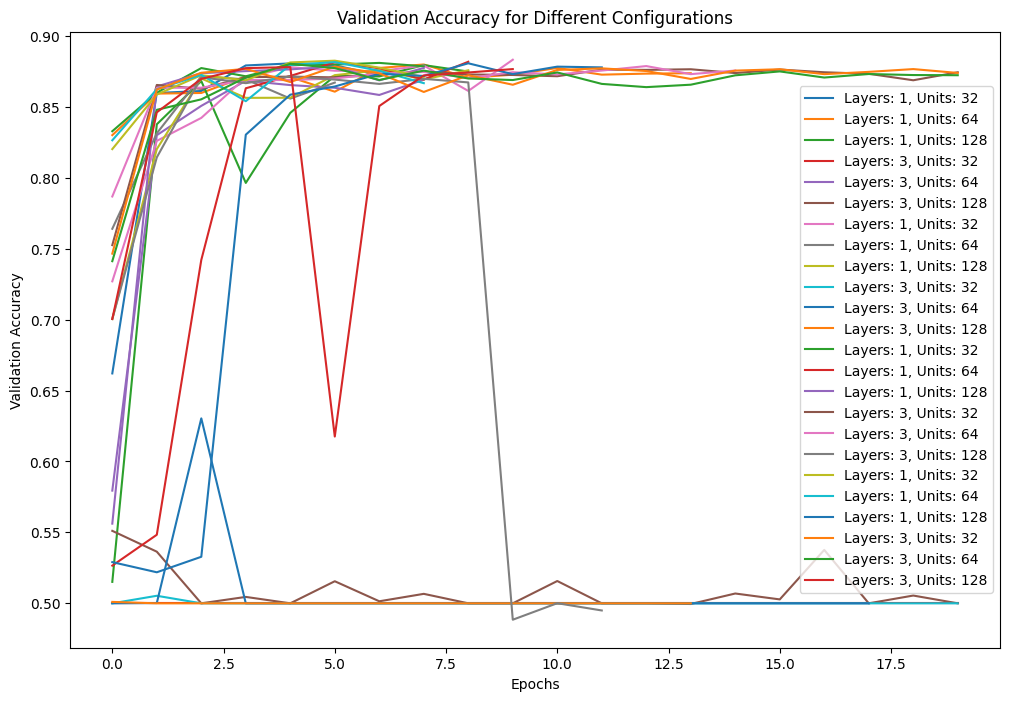

In [6]:
# Plot the validation accuracy of all experiments
plt.figure(figsize=(12, 8))

for result in results:
    plt.plot(result['history']['val_accuracy'], label=f"Layers: {result['config']['hidden_layers']}, Units: {result['config']['hidden_units']}")

plt.title('Validation Accuracy for Different Configurations')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [7]:
import pandas as pd

# Sample data from your experiments (from the results list we saved earlier)
results_data = []

for result in results:
    config = result['config']
    results_data.append({
        'Hidden Layers': config['hidden_layers'],
        'Hidden Units': config['hidden_units'],
        'Activation Function': config['activation_function'],
        'Loss Function': config['loss_function'],
        'Dropout Rate': config['dropout_rate'],
        'L2 Regularization': config['l2_reg'],
        'Test Accuracy': result['test_acc'],
        'Test Loss': result['test_loss']
    })

# Create a DataFrame from the results
df_results = pd.DataFrame(results_data)


# To display the table in a nicer format in Jupyter or notebooks:
df_results.style.format({
    'Test Accuracy': '{:.2f}',
    'Test Loss': '{:.2f}'
})


,Hidden Layers,Hidden Units,Activation Function,Loss Function,Dropout Rate,L2 Regularization,Test Accuracy,Test Loss
0,1,32,relu,binary_crossentropy,0.500000,0.010000,0.88,0.40
1,1,64,relu,binary_crossentropy,0.500000,0.010000,0.88,0.43
2,1,128,relu,binary_crossentropy,0.500000,0.010000,0.87,0.44
3,3,32,relu,binary_crossentropy,0.500000,0.010000,0.50,0.69
4,3,64,relu,binary_crossentropy,0.500000,0.010000,0.87,0.58
5,3,128,relu,binary_crossentropy,0.500000,0.010000,0.50,0.69
6,1,32,relu,mean_squared_error,0.500000,0.010000,0.88,0.14
7,1,64,relu,mean_squared_error,0.500000,0.010000,0.87,0.15
8,1,128,relu,mean_squared_error,0.500000,0.010000,0.87,0.15
9,3,32,relu,mean_squared_error,0.500000,0.010000,0.50,0.25


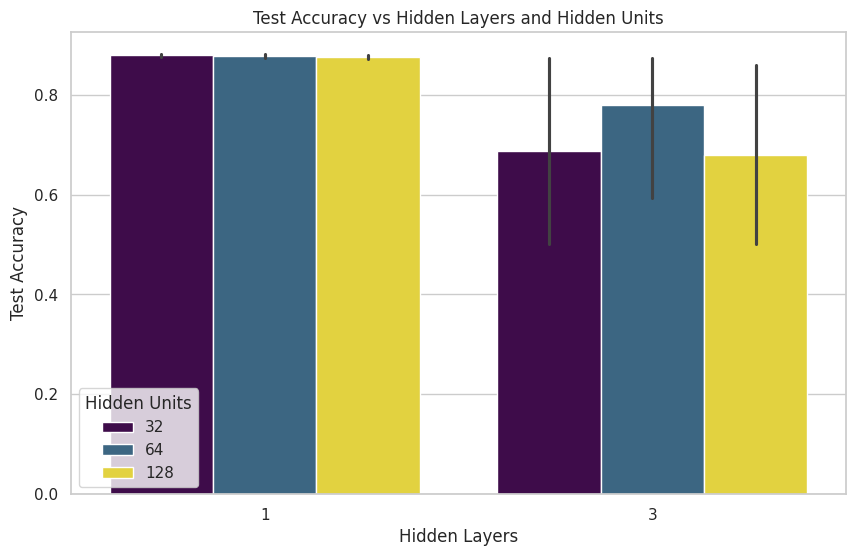

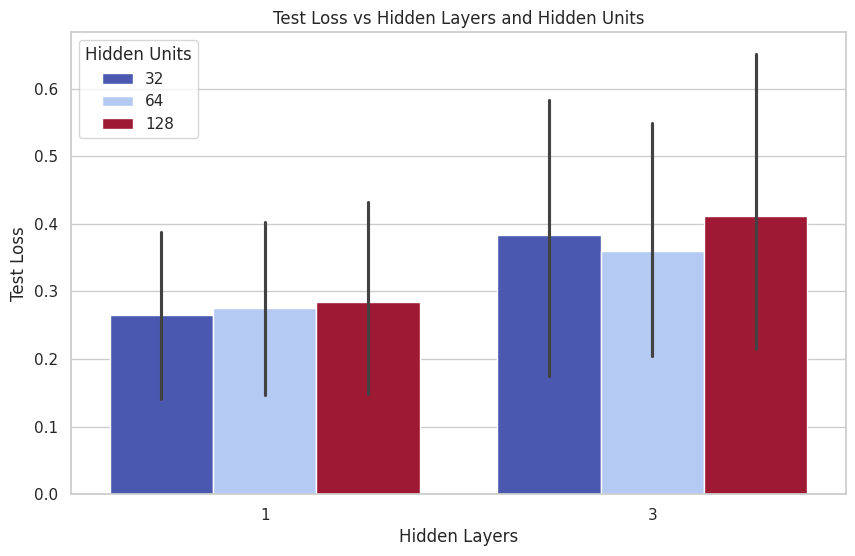

<ipython-input-8-be9289220f55>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loss Function', y='Test Accuracy', data=df_results, palette="Set2")


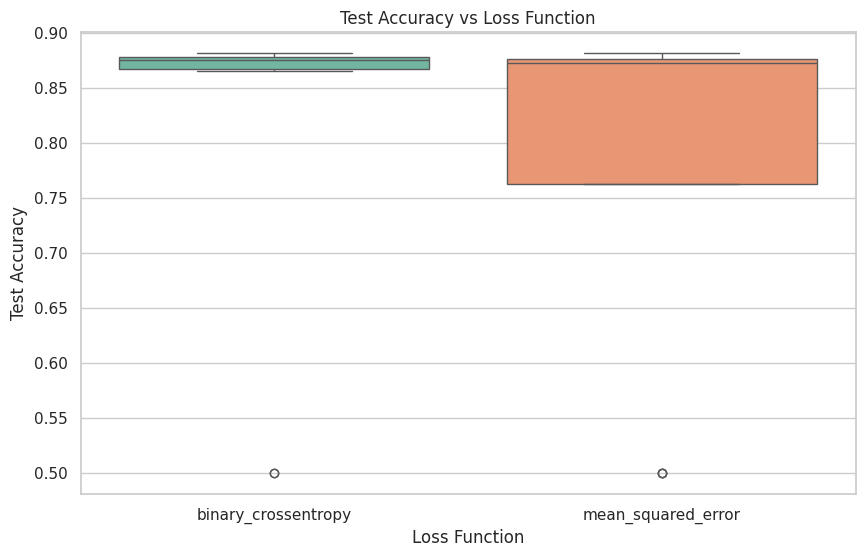

<ipython-input-8-be9289220f55>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activation Function', y='Test Loss', data=df_results, palette="Set3")


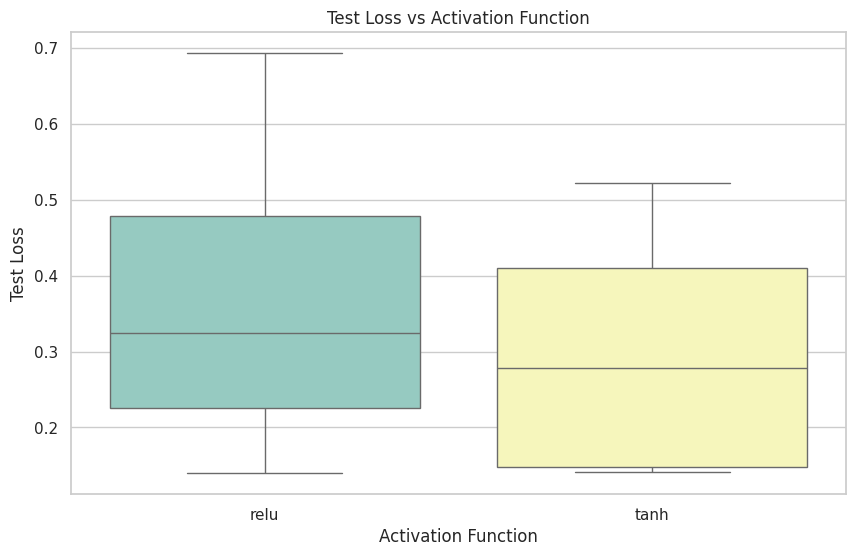

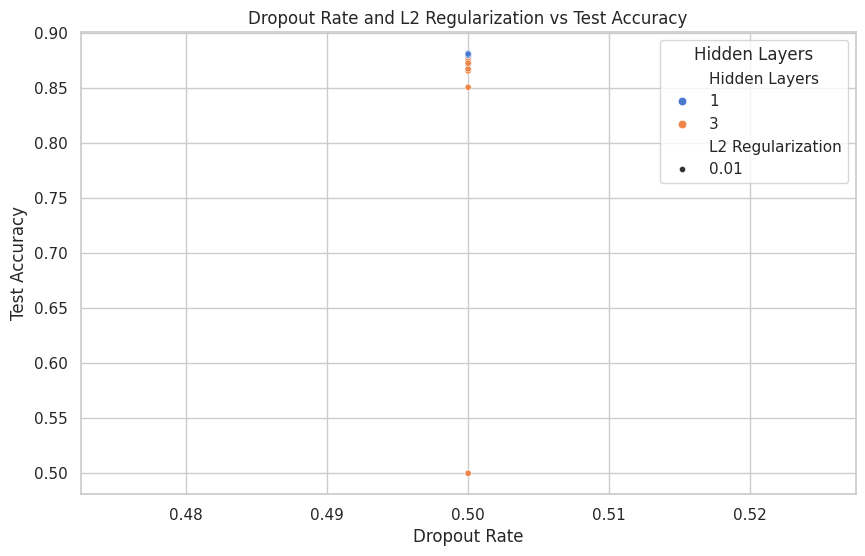

In [8]:
import seaborn as sns

sns.set(style="whitegrid")

# 1. Test Accuracy vs Hidden Layers and Hidden Units
plt.figure(figsize=(10, 6))
sns.barplot(x='Hidden Layers', y='Test Accuracy', hue='Hidden Units', data=df_results, palette="viridis")
plt.title('Test Accuracy vs Hidden Layers and Hidden Units')
plt.ylabel('Test Accuracy')
plt.xlabel('Hidden Layers')
plt.legend(title='Hidden Units')
plt.show()

# 2. Test Loss vs Hidden Layers and Hidden Units
plt.figure(figsize=(10, 6))
sns.barplot(x='Hidden Layers', y='Test Loss', hue='Hidden Units', data=df_results, palette="coolwarm")
plt.title('Test Loss vs Hidden Layers and Hidden Units')
plt.ylabel('Test Loss')
plt.xlabel('Hidden Layers')
plt.legend(title='Hidden Units')
plt.show()

# 3. Test Accuracy vs Loss Function
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loss Function', y='Test Accuracy', data=df_results, palette="Set2")
plt.title('Test Accuracy vs Loss Function')
plt.ylabel('Test Accuracy')
plt.xlabel('Loss Function')
plt.show()

# 4. Test Loss vs Activation Function
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activation Function', y='Test Loss', data=df_results, palette="Set3")
plt.title('Test Loss vs Activation Function')
plt.ylabel('Test Loss')
plt.xlabel('Activation Function')
plt.show()

# 5. Comparing Dropout Rate and L2 Regularization on Test Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dropout Rate', y='Test Accuracy', size='L2 Regularization', data=df_results, hue='Hidden Layers', palette="muted", sizes=(20, 200))
plt.title('Dropout Rate and L2 Regularization vs Test Accuracy')
plt.xlabel('Dropout Rate')
plt.ylabel('Test Accuracy')
plt.legend(title='Hidden Layers')
plt.show()

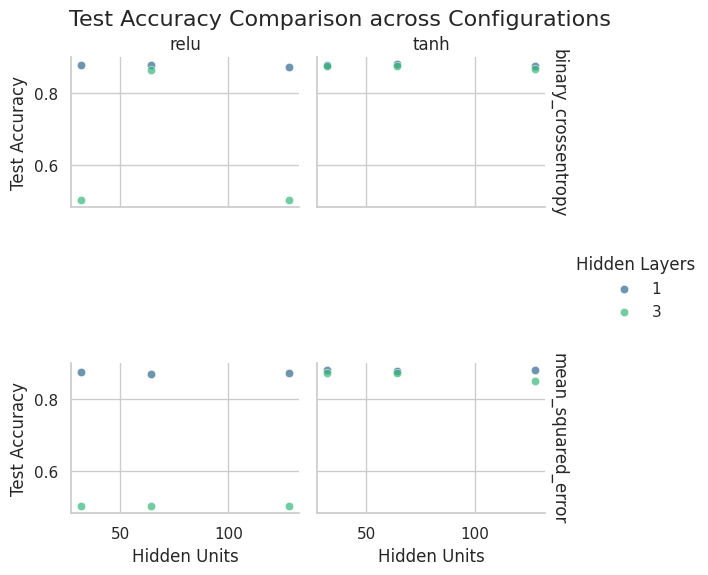

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style
sns.set(style="whitegrid")

# Create a FacetGrid to compare test accuracy across different configurations
g = sns.FacetGrid(df_results, col="Activation Function", row="Loss Function",
                  hue="Hidden Layers", palette="viridis", margin_titles=True, despine=True)

# Map the scatter plot to each facet
g.map(sns.scatterplot, "Hidden Units", "Test Accuracy", alpha=0.7)
g.set_axis_labels("Hidden Units", "Test Accuracy")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()

# Show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Test Accuracy Comparison across Configurations', fontsize=16)
plt.show()


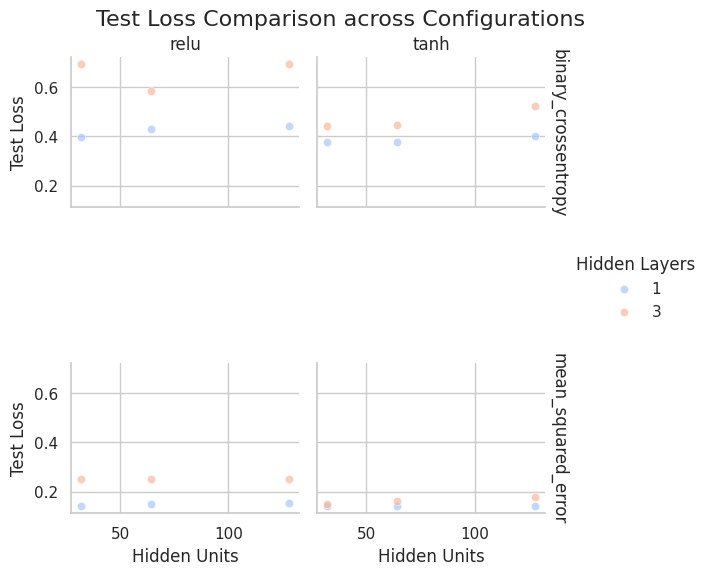

In [10]:
# Create a FacetGrid to compare test loss across different configurations
g = sns.FacetGrid(df_results, col="Activation Function", row="Loss Function",
                  hue="Hidden Layers", palette="coolwarm", margin_titles=True, despine=True)

# Map the scatter plot to each facet
g.map(sns.scatterplot, "Hidden Units", "Test Loss", alpha=0.7)
g.set_axis_labels("Hidden Units", "Test Loss")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()

# Show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Test Loss Comparison across Configurations', fontsize=16)
plt.show()